# Word Alignment scores across audio

Plot a single file's word alignment scores over time

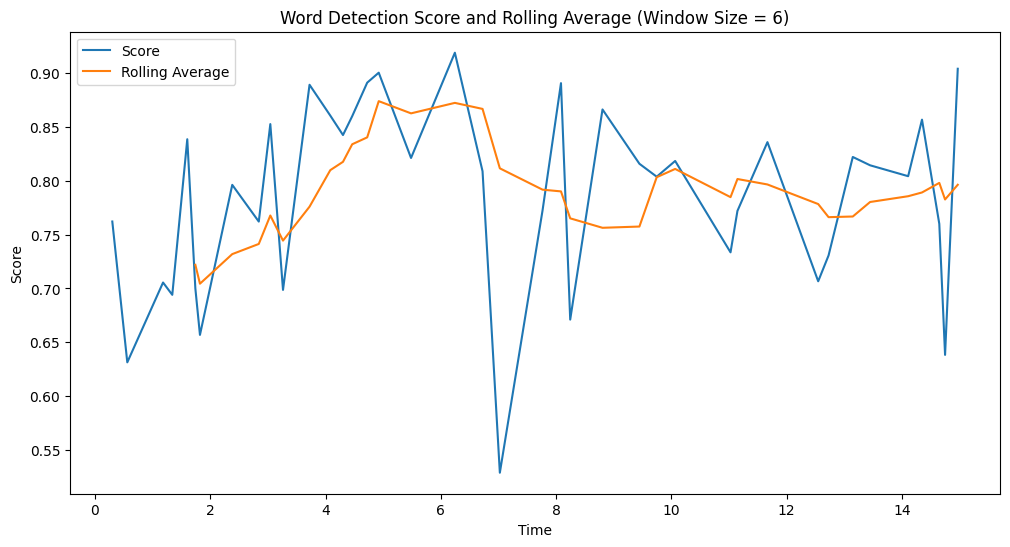

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = "../data/01_interim/2018_AIM-1418/David-Adam/David-Adam-2-utterance/David-Adam-2-utterance0-alignments.json"
df = pd.read_json(filepath)

df['rolling_avg'] = df['score'].rolling(window=6).mean()
plt.figure(figsize=(12,6))
plt.plot(df['end_ts'], df['score'], label='Score')
plt.plot(df['end_ts'], df['rolling_avg'], label='Rolling Average')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Word Detection Score and Rolling Average (Window Size = 6)')
plt.legend()
plt.show()

## Detect low alignment scores for each file

In [ ]:
from pathlib import Path

import soundfile as sf

# directory containing word alignment JSON files
audio_dir = Path("../data/01_interim/2018_AIM-1418")
filepaths = audio_dir.glob("*-alignments.json")

dfs = []
for filepath in filepaths:
    data = pd.read_json(filepath)
    data['rolling_avg'] = data['score'].rolling(window=6).mean()
    data['filename'] = filepath.stem
    dfs.append(data)
    
combined_df = pd.concat(dfs)

consecutive_threshold = 3  # Number of consecutive rows with rolling_avg below 0.5 needed
rolling_avg_score_threshold = 0.7

failed_count = 0
for filename in combined_df['filename'].unique():
    filename_rows = combined_df[combined_df['filename'] == filename]
    consecutive_count = 0
    reset_counter = False

    for rolling_avg in filename_rows['rolling_avg']:
        if rolling_avg < rolling_avg_score_threshold:
            consecutive_count += 1
            reset_counter = False
        else:
            if not reset_counter:
                consecutive_count = 0
                reset_counter = True

        if consecutive_count >= consecutive_threshold:
            failed_count += 1
            print(filename, sf.info(audio_dir / filename.replace('-words', '.wav')).duration)
            break

print(f"{failed_count} files have word scores that have word-alignment"
      f"scores that are consecutively ({consecutive_threshold}) below {rolling_avg_score_threshold}")

## Visualising forced alignment results in detail

In [9]:
import sys
sys.path.append("../scripts")

from forced_alignment import force_align


SPEECH_FILE = Path("audio.wav")
TRANSCRIPT_FILE = Path("transcript.txt")

with open(TRANSCRIPT_FILE) as f:
    transcript = f.read()
print(transcript)

WALLS|OVER|THE|TABLES|THE|FLOOREVERYTHING|HE|COULD|LAY|HIS|HANDS|ON|AND|HE|ACTUALLYI|SPOKE|TO


cuda
2.0.1+cu117
2.0.2+cu117
WALLS	(1.00-0.63): [    2,    25)
OVER	(1.00-0.61): [   31,    39)
THE	(1.00-0.49): [   41,    83)
TABLES	(0.99-0.49): [  100,   126)
THE	(0.97-0.47): [  127,   131)
FLOOREVERYTHING	(0.85-0.35): [  133,   173)
HE	(0.61-0.99): [  175,   179)
COULD	(0.50-0.51): [  181,   189)
LAY	(1.00-0.61): [  191,   198)
HIS	(0.96-0.82): [  200,   205)
HANDS	(0.75-0.67): [  207,   220)
ON	(0.82-0.91): [  225,   230)
AND	(1.00-0.96): [  233,   237)
HE	(1.00-0.74): [  264,   269)
ACTUALLYI	(1.00-0.00): [  274,   294)
SPOKE	(1.00-1.00): [  305,   316)
TO	(0.00-0.01): [  317,   319)
WALLS (0.91): 0.040 - 0.501 sec
OVER (0.85): 0.622 - 0.782 sec
THE (0.80): 0.822 - 1.664 sec
TABLES (0.77): 2.005 - 2.526 sec
THE (0.72): 2.546 - 2.627 sec
FLOOREVERYTHING (0.70): 2.667 - 3.469 sec
HE (0.80): 3.509 - 3.589 sec
COULD (0.63): 3.629 - 3.790 sec
LAY (0.83): 3.830 - 3.970 sec
HIS (0.91): 4.010 - 4.110 sec
HANDS (0.78): 4.151 - 4.411 sec
ON (0.87): 4.511 - 4.612 sec
AND (0.77): 4.672 - 4

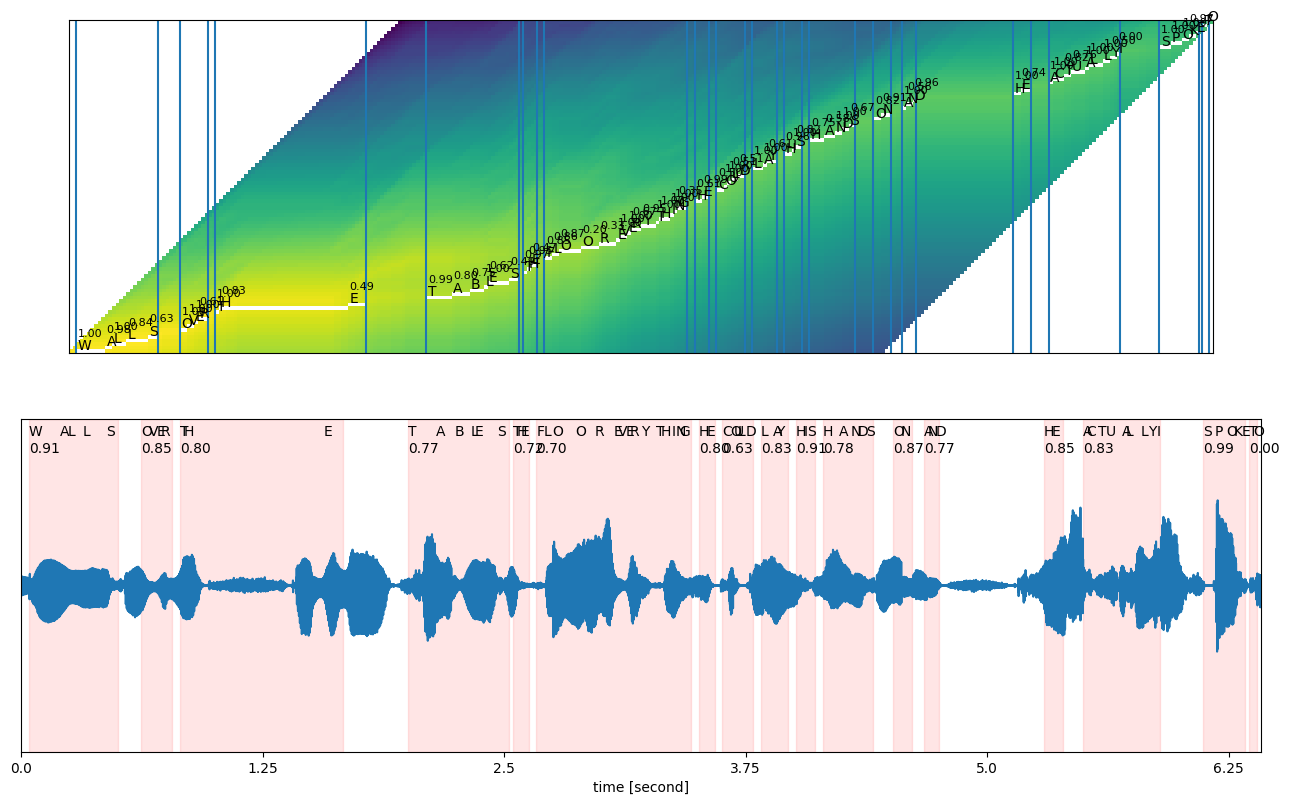

[{'label': 'WALLS',
  'start': 2,
  'end': 25,
  'score': 0.9072974071554516,
  'start_score': 0.998553991317749,
  'end_score': 0.6345955009261767,
  'start_ts': 0.0400625,
  'end_ts': 0.50125,
  'sample_rate': 16000},
 {'label': 'OVER',
  'start': 31,
  'end': 39,
  'score': 0.8533761612543458,
  'start_score': 0.9999829530715942,
  'end_score': 0.6090909737928693,
  'start_ts': 0.6215625,
  'end_ts': 0.7819375,
  'sample_rate': 16000},
 {'label': 'THE',
  'start': 41,
  'end': 83,
  'score': 0.7971977226582302,
  'start_score': 0.9960209727287292,
  'end_score': 0.4908160385355586,
  'start_ts': 0.8220625,
  'end_ts': 1.6641875,
  'sample_rate': 16000},
 {'label': 'TABLES',
  'start': 100,
  'end': 126,
  'score': 0.7734779305414682,
  'start_score': 0.9887739760535104,
  'end_score': 0.49020462663126335,
  'start_ts': 2.0050625,
  'end_ts': 2.5264375,
  'sample_rate': 16000},
 {'label': 'THE',
  'start': 127,
  'end': 131,
  'score': 0.7155430789571255,
  'start_score': 0.966783344

In [10]:
force_align(SPEECH_FILE=SPEECH_FILE,
            TRANSCRIPT_FILE=TRANSCRIPT_FILE,
            verbose=True,
            save_audiofiles=False,
            plot_result=True)